# Appendix A: Supplumental Topics

In [54]:
import math
import sympy
import random
import numpy as np
import pandas as pd
import scipy as sp
import pulp
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from IPython.display import display, Latex

## Using LaTeX Rendering with Sympy

In [55]:
# Using sympy to conver an exxpression into LaTeX

x, y = sympy.symbols("x y")
z = x**2 / sympy.sqrt(2 * y**3 - 1)

latex_str = sympy.latex(z)

In [56]:
# Display the LaTeX expression in the notebook

display(Latex(f'${latex_str}$'))

<IPython.core.display.Latex object>

## Binomial Distribution from Scratch

In [57]:
# Building a binomial distribution from scratch

def factorial(n: int):
    f = 1
    for i in range(n):
        f*= (i + 1)
    return f

def binomial_coefficient(n: int, k: int):
    return factorial(n) / (factorial(k) * factorial(n - k))

def binomial_distribution(k: int, n: int, p:float):
    return binomial_coefficient(n, k) * (p ** k) * (1 - p) ** (n - k)

n = 10
p = 0.9

for k in range(n + 1):
    probability = binomial_distribution(k, n, p)
    print("{0} - {1}".format(k, probability))

0 - 9.999999999999978e-11
1 - 8.999999999999981e-09
2 - 3.644999999999994e-07
3 - 8.747999999999988e-06
4 - 0.00013778099999999982
5 - 0.0014880347999999984
6 - 0.01116026099999999
7 - 0.057395627999999976
8 - 0.19371024449999993
9 - 0.38742048900000003
10 - 0.3486784401000001


## Beta Distribution from Scratch

In [58]:
# Beta distribution from scratch

def factorial(n: int):
    f = 1
    for i in range(n):
        f*= (i + 1)
    return f

def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)

    return total_sum * delta_x

def beta_distribution(x: float, alpha: float, beta: float) -> float:
    if x < 0 or x > 1:
        raise ValueError("x must be between 0 and 1.")
    
    numerator = x ** (alpha - 1) * (1 - x) ** (beta - 1)
    denominator = (1 * factorial(alpha - 1) * factorial(beta - 1)) /\
    (1 * factorial(alpha + beta - 1))

    return numerator / denominator
                
greater_than_90 = approximate_integral(a=0.90, b=1.0, n=100, f=lambda x: beta_distribution(x, 8, 2))
less_than_90 = 1 - greater_than_90

print("GREATER THAN 90%: {}, LESS THAN 90%: {}".format(greater_than_90, less_than_90))

GREATER THAN 90%: 0.22516170312967945, LESS THAN 90%: 0.7748382968703206


## Deriving Bayes Theorem

In [59]:
def bayes_theorem_with_population(n, p_coffee_drinker, p_cancer, p_coffee_drinker_given_cancer):
    """
    Calculate P(cancer | coffee drinker) using population data.
    """
    # Step 1: Calculate the number of people in each group
    num_coffee_drinkers = p_coffee_drinker * n
    num_cancer_patients = p_cancer * n
    num_coffee_and_cancer = p_coffee_drinker_given_cancer * num_cancer_patients

    # Step 2: Calculate the probability of having cancer given that someone is a coffee drinker
    p_cancer_given_coffee_drinker = num_coffee_and_cancer / num_coffee_drinkers

    return p_cancer_given_coffee_drinker

def bayes_theorem_direct(p_coffee_drinker, p_cancer, p_coffee_drinker_given_cancer):
    """
    Calculate P(cancer | coffee drinker) directly using Bayes' theorem.
    """
    # Calculate P(coffee drinker ∩ cancer)
    p_coffee_and_cancer = p_coffee_drinker_given_cancer * p_cancer

    # Calculate P(cancer | coffee drinker)
    p_cancer_given_coffee_drinker = p_coffee_and_cancer / p_coffee_drinker

    return p_cancer_given_coffee_drinker

# Given data
n = 100000
p_coffee_drinker = 0.65
p_cancer = 0.005
p_coffee_drinker_given_cancer = 0.85

# Calculate using both methods
result_with_population = bayes_theorem_with_population(n, p_coffee_drinker, p_cancer, p_coffee_drinker_given_cancer)
result_direct = bayes_theorem_direct(p_coffee_drinker, p_cancer, p_coffee_drinker_given_cancer)

# Compare the results using np.isclose()
if np.isclose(result_with_population, result_direct, atol=1e-9):
    print(f"The results are equal within the given tolerance.\nValue: {result_with_population}")
else:
    print(f"The results are NOT equal.\nPopulation-based result: {result_with_population}\nDirect result: {result_direct}")


The results are equal within the given tolerance.
Value: 0.006538461538461538


## CDF and Inverse CDF from Scratch

In [60]:
# The normal distribution function in python

def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1 / (math.sqrt(2 * math.pi) * std_dev)) * \
           math.exp(-0.5 * ((x - mean) ** 2 / (std_dev ** 2)))

def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)

    return total_sum * delta_x

p_between_61_and_62 = approximate_integral(a=61, b=62, n=7, f=lambda x: normal_pdf(x, 64.43, 2.99))
print(p_between_61_and_62)

0.0825344984983386


In [61]:
# Using the inverse CDF (called ppf()) in python

def normal_cdf(x: float, mean: float, std_dev:float) -> float:
    return (1 + math.erf((x - mean) / math.sqrt(2) / std_dev)) / 2

mean = 64.43
std_dev = 2.99

x = normal_cdf(66, mean, std_dev) - normal_cdf(62, mean, std_dev)
print(x)

0.49204501470628936


In [62]:
# Generating random golden retriever weights

def inv_normal_cdf(p: float, mean: float, std_dev: float) -> float:
    return mean + (std_dev * (2 ** 0.5) * sp.special.erfinv((2 * p) - 1))

mean = 64.43
std_dev = 2.99

for i in range(0, 1000):
    random_p = random.uniform(0, 1)
    print(inv_normal_cdf(random_p, mean, std_dev))

70.17323796688284
62.89085978808046
60.53751754308398
67.31362222736539
65.55433312803326
61.627767448852836
67.17252345028938
67.17422965784112
65.97007611177924
67.2859195188807
61.630828847842686
65.2510154500454
63.99191468491324
66.84313997563804
58.13165729416416
63.79449602684924
65.86848254193673
61.37738538918161
68.92511829027448
63.272722365112614
64.81034337888707
68.35344540204329
61.78267785970736
65.8303009691804
66.44541832808274
70.60749795219652
65.15924173087905
57.037667840350856
62.03544717494209
61.04836235609319
63.66197331817686
63.536775527935504
63.46253256086406
65.11236044874065
61.222302370440566
65.08772501606549
65.23712565712941
71.28049836747053
59.86099625011082
62.852376004864176
63.9114988365602
64.37544671638467
56.91302183316454
63.226431446919996
64.43740749079957
66.79418399229007
69.09240273584281
63.71320890817093
59.639237610329985
71.03170508308258
64.08076558353477
67.02169701103452
70.25918077926273
64.33268170057353
71.40718795567867
66.32

## Use e to Predict Event Probability over Time

Probability of event within 5 timesteps: 0.22119921692859512


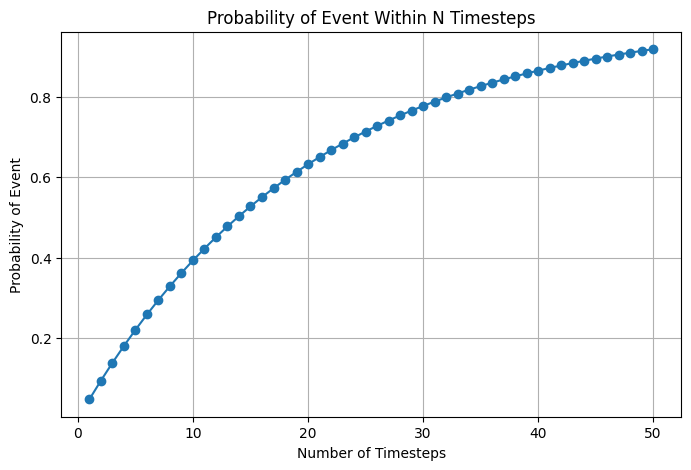

In [63]:
# Predicting the probability of a an event over time given compounding probability

p_event_single_timestep = 0.05
num_timesteps = 5

p_event_5_timesteps = 1 - math.exp(-p_event_single_timestep * num_timesteps)
print(f"Probability of event within 5 timesteps: {p_event_5_timesteps}")

# Create probabilities over multiple timesteps
num_timesteps = 50
timesteps = range(1, num_timesteps + 1)
probabilities = [1 - math.exp(-p_event_single_timestep * n) for n in timesteps]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(timesteps, probabilities, marker='o')
plt.title('Probability of Event Within N Timesteps')
plt.xlabel('Number of Timesteps')
plt.ylabel('Probability of Event')
plt.grid(True)
plt.show()

## Hill Climbing and Linear Regression

In [64]:
# Using hill climbing for linear regression

df = pd.read_csv("https://bit.ly/2KF29Bd")
points = [p for p in df.itertuples()]
num_points = float(len(points))

# Starting parameters
m = 0
b = 0
best_loss= float('inf')

# Training loop
iterations = 150000
for i in range(iterations):
    m_adjust = np.random.normal(0,1)
    b_adjust = np.random.normal(0,1)

    m += m_adjust
    b += b_adjust

    new_loss = 0
    for p in points:
        new_loss += (p.y - (m * p.x + b)) ** 2

    if new_loss < best_loss: 
        best_loss = new_loss
    else:
        m -= m_adjust
        b -= b_adjust

print(f"Final loss: {best_loss}")
print(f"Final parameters: y = {m}x + {b}")

Final loss: 28.097064895879466
Final parameters: y = 1.9394045787009453x + 4.736360097864576


## Hill Climbing and Logistic Regression

In [65]:
# Using hill climbing for a simple logistic regression

df = pd.read_csv("https://tinyurl.com/y2cocoo7")
points = [p for p in df.itertuples()]

# Starting parameters
best_likelihood = -float('inf')
b0=0.01
b1=0.01

def predict_probability(x):
    return 1 / (1.0001 + math.exp(-(b0 + b1 * x)))

# Training loop
num_iterations = 1000000
for i in range(num_iterations):
    random_b = random.choice(range(2))
    random_adjust = np.random.normal()

    if random_b == 0:
        b += random_adjust
    elif random_b == 1:
        b1 += random_adjust

    true_estimates = sum(math.log(predict_probability(p.x)) for p in points if p.y == 1)
    false_estimates = sum(math.log(1 - predict_probability(p.x)) for p in points if p.y == 0)
    total_likelihood = true_estimates + false_estimates

    if best_likelihood < total_likelihood:
        best_likelihood = total_likelihood
    elif random_b == 0:
        b0 -= random_adjust
    elif random_b == 1:
        b1 -= random_adjust

print(f"Final likelihood: {best_likelihood}")
print(f"Final paramaters: 1 / (1 + exp(-{b0} + {b1}*x))")

Final likelihood: -9.946343841233805
Final paramaters: 1 / (1 + exp(--337.74735271724194 + 0.6942345921813419*x))


## A Brief Intro to Linear Programming

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/miesner.jacob/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/xh/fhzpv__n2mbg9shw10xrdnkm0000gn/T/ecc1f950d6c3470e8bd492c93d0780bf-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/xh/fhzpv__n2mbg9shw10xrdnkm0000gn/T/ecc1f950d6c3470e8bd492c93d0780bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 18 RHS
At line 21 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2593.75 - 0.00 seconds
Cgl0004I processed model has 2 rows, 2 columns (2 integer (0 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 99.9999
Cbc0012I Integer solution of -2200 found by DiveCoefficient after 0 iterations and 0 nodes (0.01 s

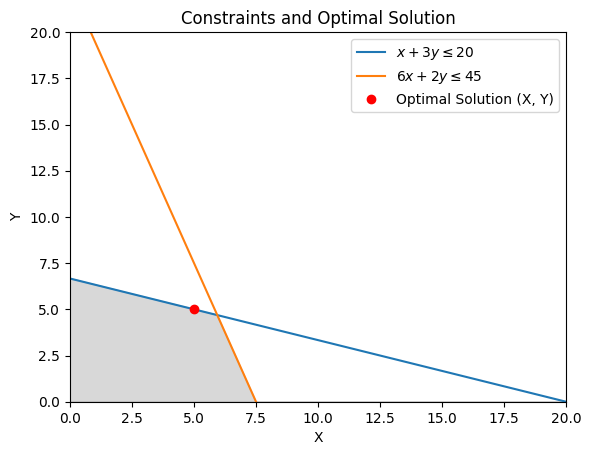

In [66]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

# Declare variables
x = pulp.LpVariable("x", 0, cat=pulp.LpInteger)
y = pulp.LpVariable("y", 0, cat=pulp.LpInteger)

prob = pulp.LpProblem("factory_problem", pulp.LpMaximize)

# Define constraints
prob += x + 3 * y <= 20, "Constraint 1"
prob += 6 * x + 2 * y <= 45, "Constraint 2"

# Define objective function
prob += 200 * x + 300 * y, "Objective"

# Solve the problem
status = prob.solve()

# Print results
opt_x = pulp.value(x)
opt_y = pulp.value(y)
print("Optimal X value:", opt_x)
print("Optimal Y value:", opt_y)



# Plotting
x_vals = np.linspace(0, 20, 200)

# Constraint lines
y1 = (20 - x_vals) / 3
y2 = (45 - 6 * x_vals) / 2

# Plot constraints
plt.plot(x_vals, y1, label=r'$x + 3y \leq 20$')
plt.plot(x_vals, y2, label=r'$6x + 2y \leq 45$')

# Feasible region
plt.fill_between(x_vals, np.minimum(y1, y2), color='grey', alpha=0.3)

# Optimal point
plt.plot(opt_x, opt_y, 'ro', label='Optimal Solution (X, Y)')

# Plot settings
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.title('Constraints and Optimal Solution')

plt.show()

## MNIST Classifier Using scikit-learn

Training set score: 0.9999571422448892
Test set score: 0.9760006856946944


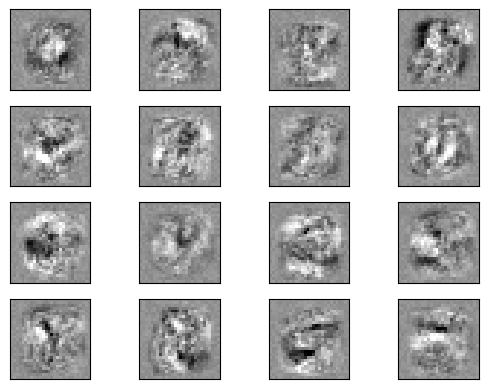

In [67]:
# A handwsritten digit classifier neural network in scikit-learn

df = pd.read_csv("https://bit.ly/3ilJc2C", compression="zip", delimiter=",")

X = (df.values[:, :-1] / 255)
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=1/3, random_state=42, stratify=Y
)

nn = MLPClassifier(
    solver="sgd",
    hidden_layer_sizes=(100, ),
    activation="logistic",
    max_iter=480,
    learning_rate_init=0.1
)

nn.fit(X_train, Y_train)

print(f"Training set score: {nn.score(X_train, Y_train)}")
print(f"Test set score: {nn.score(X_test, Y_test)}")

# Plot heatmap
fig, axes = plt.subplots(4, 4)

vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax= 0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()